# Name: Ronit Kumar Kataria  (06451)
# Email: rk06451@st.habib.edu.pk
# HomeWork title: CS 457 - Homework Assignment 9: Classification



In [1]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('CreditCardData.csv')


<h2> Q1:</h2>
<br>
Need to clean the data. Remove all the rows which have any missing values in any
column 

In [3]:
# So the question is to remove all the columns which have any missing value so first we need to find the columns which have missing values and by missing values we mean ? in the data set

# For thant I will be replacing ? with Nan and then finding the columns which have Nan values

df.replace('?', np.NaN, inplace=True)


# Simply removing the entire record where there is a missing value
df = df.dropna()
# Checking whether still there is any column which has missing values. 
missingColumns = df.columns[df.isna().any()].tolist()
print(missingColumns)

[]


<h2> Q2:</h2>
<br>
Replace the Approved column (response variable) values from -/+ to 0/1 or No/Yes
based on your preference.

In [4]:
# for convention and easier approach I will be replacing - to 0 and + to 1 so that I dont have to do the hot new encoding again. 

df['Approved'].replace('-', 0, inplace=True)
df['Approved'].replace('+', 1, inplace=True)
df['Approved']

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: Approved, Length: 653, dtype: int64

<h2> Q3:</h2>
<br>
Create a train and test set after cleaning the data. Use 30% (0.3) records for test set.
Use the same train and test set for all your analysis with different classifiers

In [5]:
df.columns

Index(['Male', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [6]:
num_cols = df._get_numeric_data().columns
num_cols
catgCol = []
allCol = df.columns
for i in allCol:
    if i not in num_cols:
        catgCol.append(i)
print(catgCol)


['Male', 'Age', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ZipCode']


In [7]:
# Before training it is necessary to convert the categorical data into numerical with help of hotEncoding so that it becomes easier for training. 

data = pd.get_dummies(df, columns=['Male', 'Married', 'BankCustomer', 'EducationLevel',
                      'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen',])

print(data.columns)

Index(['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income',
       'Approved', 'Male_a', 'Male_b', 'Married_l', 'Married_u', 'Married_y',
       'BankCustomer_g', 'BankCustomer_gg', 'BankCustomer_p',
       'EducationLevel_aa', 'EducationLevel_c', 'EducationLevel_cc',
       'EducationLevel_d', 'EducationLevel_e', 'EducationLevel_ff',
       'EducationLevel_i', 'EducationLevel_j', 'EducationLevel_k',
       'EducationLevel_m', 'EducationLevel_q', 'EducationLevel_r',
       'EducationLevel_w', 'EducationLevel_x', 'Ethnicity_bb', 'Ethnicity_dd',
       'Ethnicity_ff', 'Ethnicity_h', 'Ethnicity_j', 'Ethnicity_n',
       'Ethnicity_o', 'Ethnicity_v', 'Ethnicity_z', 'PriorDefault_f',
       'PriorDefault_t', 'Employed_f', 'Employed_t', 'DriversLicense_f',
       'DriversLicense_t', 'Citizen_g', 'Citizen_p', 'Citizen_s'],
      dtype='object')


In [8]:
dataTrain, dataTest = train_test_split(data, test_size=0.3, random_state=100)


<h2> Q4:</h2>
<br>
In your code, set the seed after you read the data. This will keep your data and
calculation consistent throughout the analysis irrespective of multiple runs. See the
example code for the class random_state=99

<h2> Q5:</h2>
<br>
Create a classification model to predict Approved status using Decision Tree.
Interpret the decision tree. Discuss which attributes are important and which are not
important. Include all the analysis steps including Tree Pruning Analysis and compare
the results before and after pruning.

In [9]:
X = data.drop(['Approved'], axis=1)
Y = data['Approved']
dt = tree.DecisionTreeClassifier(random_state=99)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=100)

dtmodelTrain = dt.fit(X_train, y_train)
dtmodelTrain.feature_importances_



array([0.05573891, 0.08281139, 0.02040212, 0.00671275, 0.06674618,
       0.06299288, 0.        , 0.01294875, 0.        , 0.        ,
       0.        , 0.        , 0.01546751, 0.00734207, 0.        ,
       0.0201675 , 0.00174273, 0.        , 0.00709034, 0.        ,
       0.00122405, 0.        , 0.01037337, 0.00667461, 0.00964958,
       0.        , 0.        , 0.00580144, 0.02535719, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.51199466, 0.        , 0.        ,
       0.05106232, 0.01769964, 0.        , 0.        , 0.        ,
       0.        ])

In [11]:
train_pred = dtmodelTrain.predict(X_train)
train_pred


array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [12]:
accTrain = (accuracy_score(train_pred, y_train) * 100)
accTrain

100.0

In [13]:
test_pred = dtmodelTrain.predict(X_test)


In [14]:
accTest = (accuracy_score(test_pred, y_test)* 100)
accTest


83.16326530612244

<h3>Analysis</h3>
This differnce in test accuracy and train accuracy is significant which means that the model is overfitted and we need to correct it out. 

In [15]:
treeRepr = tree.export_text(dtmodelTrain)
# fig = plt.figure(figsize=(50, 45))
# _ = tree.plot_tree(dtmodelTrain,
#                    feature_names=list(X.columns),
#                    class_names=Y.value_counts().index,
#                    filled=True)

print(treeRepr)


|--- feature_37 <= 0.50
|   |--- feature_40 <= 0.50
|   |   |--- feature_4 <= 75.00
|   |   |   |--- feature_1 <= 22.04
|   |   |   |   |--- feature_5 <= 100.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  100.00
|   |   |   |   |   |--- feature_5 <= 262.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  262.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  22.04
|   |   |   |   |--- class: 0
|   |   |--- feature_4 >  75.00
|   |   |   |--- feature_5 <= 125.00
|   |   |   |   |--- feature_0 <= 37.46
|   |   |   |   |   |--- feature_0 <= 33.29
|   |   |   |   |   |   |--- feature_1 <= 10.75
|   |   |   |   |   |   |   |--- feature_1 <= 2.52
|   |   |   |   |   |   |   |   |--- feature_15 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_18 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_24 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |-

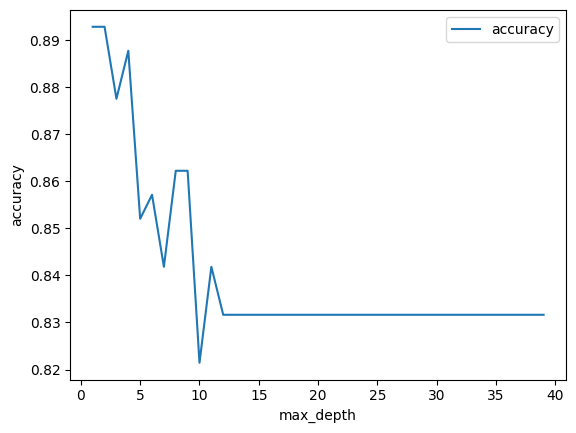

In [16]:
# to solve the problem of overfitting we will have to narrow down some braches of decission tree. 
maxdepth = []
accuracy = []
for i in range(1, 40):
    purTree = tree.DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=99)
    purTree.fit(X_train, y_train)
    purePred = purTree.predict(X_test)
    tempAcc = accuracy_score(y_test, purePred)
    accuracy.append(tempAcc)
    maxdepth.append(i)

data = pd.DataFrame({'accuracy': pd.Series(
    accuracy), 'max_depth': pd.Series(maxdepth)})
plt.plot('max_depth', 'accuracy', data=data)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()


So according to above model, it seems that with increasing depth we are decreasing our chances of fitmodel. so if we make less branches then we can archieve higher accuracy. Now lets try for Accuracy Model. 

In [17]:
dt = tree.DecisionTreeClassifier(criterion='gini',max_depth=4)

In [18]:
dtmodel = dt.fit(X_train, y_train)
train_pred = dtmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100


89.93435448577681

<h3> Final Analysis on Decission Tree With Pruning Model </h3>
<br>
So according to the results shows above, we can clearly see that when we did not apply pruning, the model was being overfitted as it caused the less accuracy of 85.7%. After Pruning we found the best depth of Model which came out to be 89.9% which means that pruning did increase the accuracy of getting the right results. 

<h2> Q6:</h2>
<br>
Create a classification model to predict Approved status using RandomForest.
Include all the analysis steps including variable importance plot. Try atleast 5
different values of n_estimators (number of trees) and compare the classification
error. Pick the best model (based on n_estimators) for your final comparison

In [19]:
nEstimatorList = [50, 100, 150, 200, 250, 300]
resultDic = {}

for i in nEstimatorList:
    rf_nEsti = RandomForestClassifier(n_estimators=i)
    rfModel_nEsti = rf_nEsti.fit(X_train, y_train)
    trainPredrf = rfModel_nEsti.predict(X_train)
    accuracyTrain = (accuracy_score(trainPredrf, y_train) * 100)
    testPredrf = rfModel_nEsti.predict(X_test)
    accuracyTest = (accuracy_score(testPredrf, y_test) * 100)
    accuracyTest
    resultDic[i] = accuracyTest
    

sorted_dic = sorted(resultDic.items(), key= lambda x: x[1], reverse=True)
print(sorted_dic)

[(50, 91.3265306122449), (100, 91.3265306122449), (200, 91.3265306122449), (150, 90.81632653061224), (250, 90.81632653061224), (300, 90.81632653061224)]


Text(0.5, 0, 'Random Forest Feature Importance')

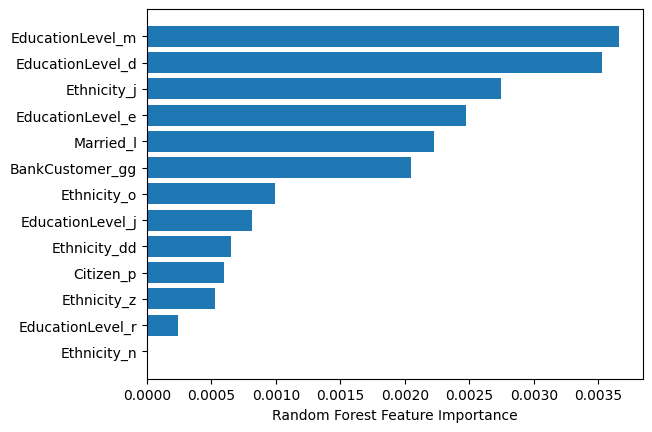

In [20]:
# So the best model we have got so far is with 50 as this is giving us the greatest accuracy so far. 
rf = RandomForestClassifier(n_estimators=50)
rfmodel = rf_nEsti.fit(X_train, y_train)

# Though there were 46 colums initially and it was becoming very hard to display the improtnace of all of them. Thus I first handled the importance of all features and reversed sorted it. This gave me those parameters or features which have highest importance so displayed that. 

sorted_idx = rfmodel.feature_importances_.argsort()
plt.barh(list(X.columns[sorted_idx])[0:13],
         rfmodel.feature_importances_[sorted_idx][0:13])
plt.xlabel("Random Forest Feature Importance")



The Most Important feature we have got so far is Education Level m 

<h2> Q7:</h2>
<br>

Report the comparison between Decision Tree and RandomForest in terms of
classification performance



<h2> Analysis </h2>
A decision tree combines some decisions, whereas a random forest combines several decision trees. Thus, it is a long process, yet slow. Whereas, a decision tree is fast and operates easily on large data sets, especially the linear one.

In terms of Classification performance we can see that Random Forest has archieved higher amount of accuracy of 91.33 while Decission tree was only able to get 89.9. Random Forest used 50 decission trees and came up with this accuracy.  

Cross Validation Score

In [21]:

scoresDT = cross_val_score(dtmodel, X, Y, cv=5)
print(f'Cross Validation Score for Decission Tree Model{scoresDT.mean()}')

scoresRf = cross_val_score(rfmodel, X, Y, cv=5)
print(f'Cross Validation Score for Random Forest Model {scoresRf.mean()}')


Cross Validation Score for Decission Tree Model0.8207633587786258
Cross Validation Score for Random Forest Model 0.854480328831474


We can see that Decission tree model has lower score which means that model is overfitted a bit whereas Random Froest Model Score is higher than Dt model which means that there is slightly improvement in the random forest fitting.  

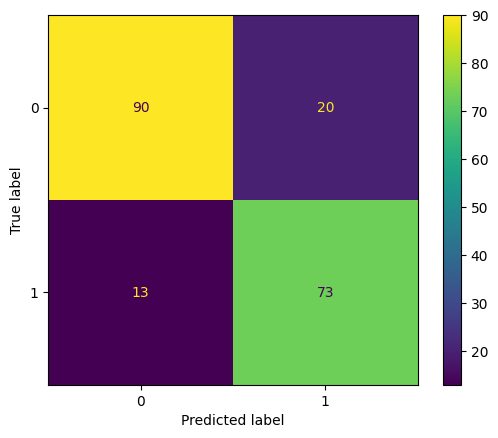

In [22]:
# To test the score I have also created Confusion Matrix too.
cmdt1 = confusion_matrix(y_train,train_pred)
cmdt2 = confusion_matrix(y_test, test_pred)
cp = ConfusionMatrixDisplay(cmdt2, display_labels= dtmodel.classes_)
cp.plot()


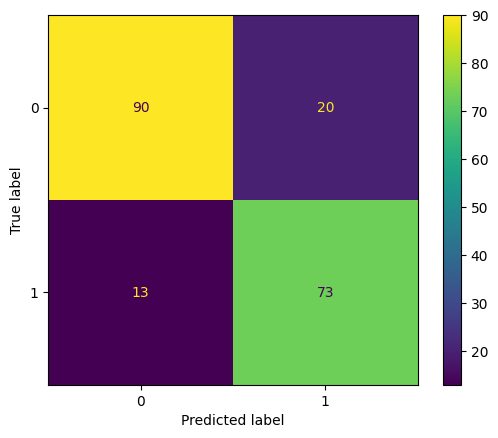

In [23]:
cmRf1 = confusion_matrix(y_train, train_pred)
cmRF2 = confusion_matrix(y_test, test_pred)
cp = ConfusionMatrixDisplay(cmRF2, display_labels=rfmodel.classes_)
cp.plot()


Fortunatly the confusion matrix is same for both the model. I may be wrong too

# Part 2
Recommendation using mcdonalds.csv

Build a decision tree to recommend similar food based on their attributes. Interpret
your decision tree and tell some interesting insights from it. You do not (necessarily)
need to pick all the food (rows) and attributes (columns). Just pick 3 similar food
items of your choice and explain/interpret your recommendations

In [24]:
mcDf = pd.read_csv('mcdonalds.csv')

In [25]:
# dropping the first column
mcDf = mcDf.drop('restaurant', axis=1)

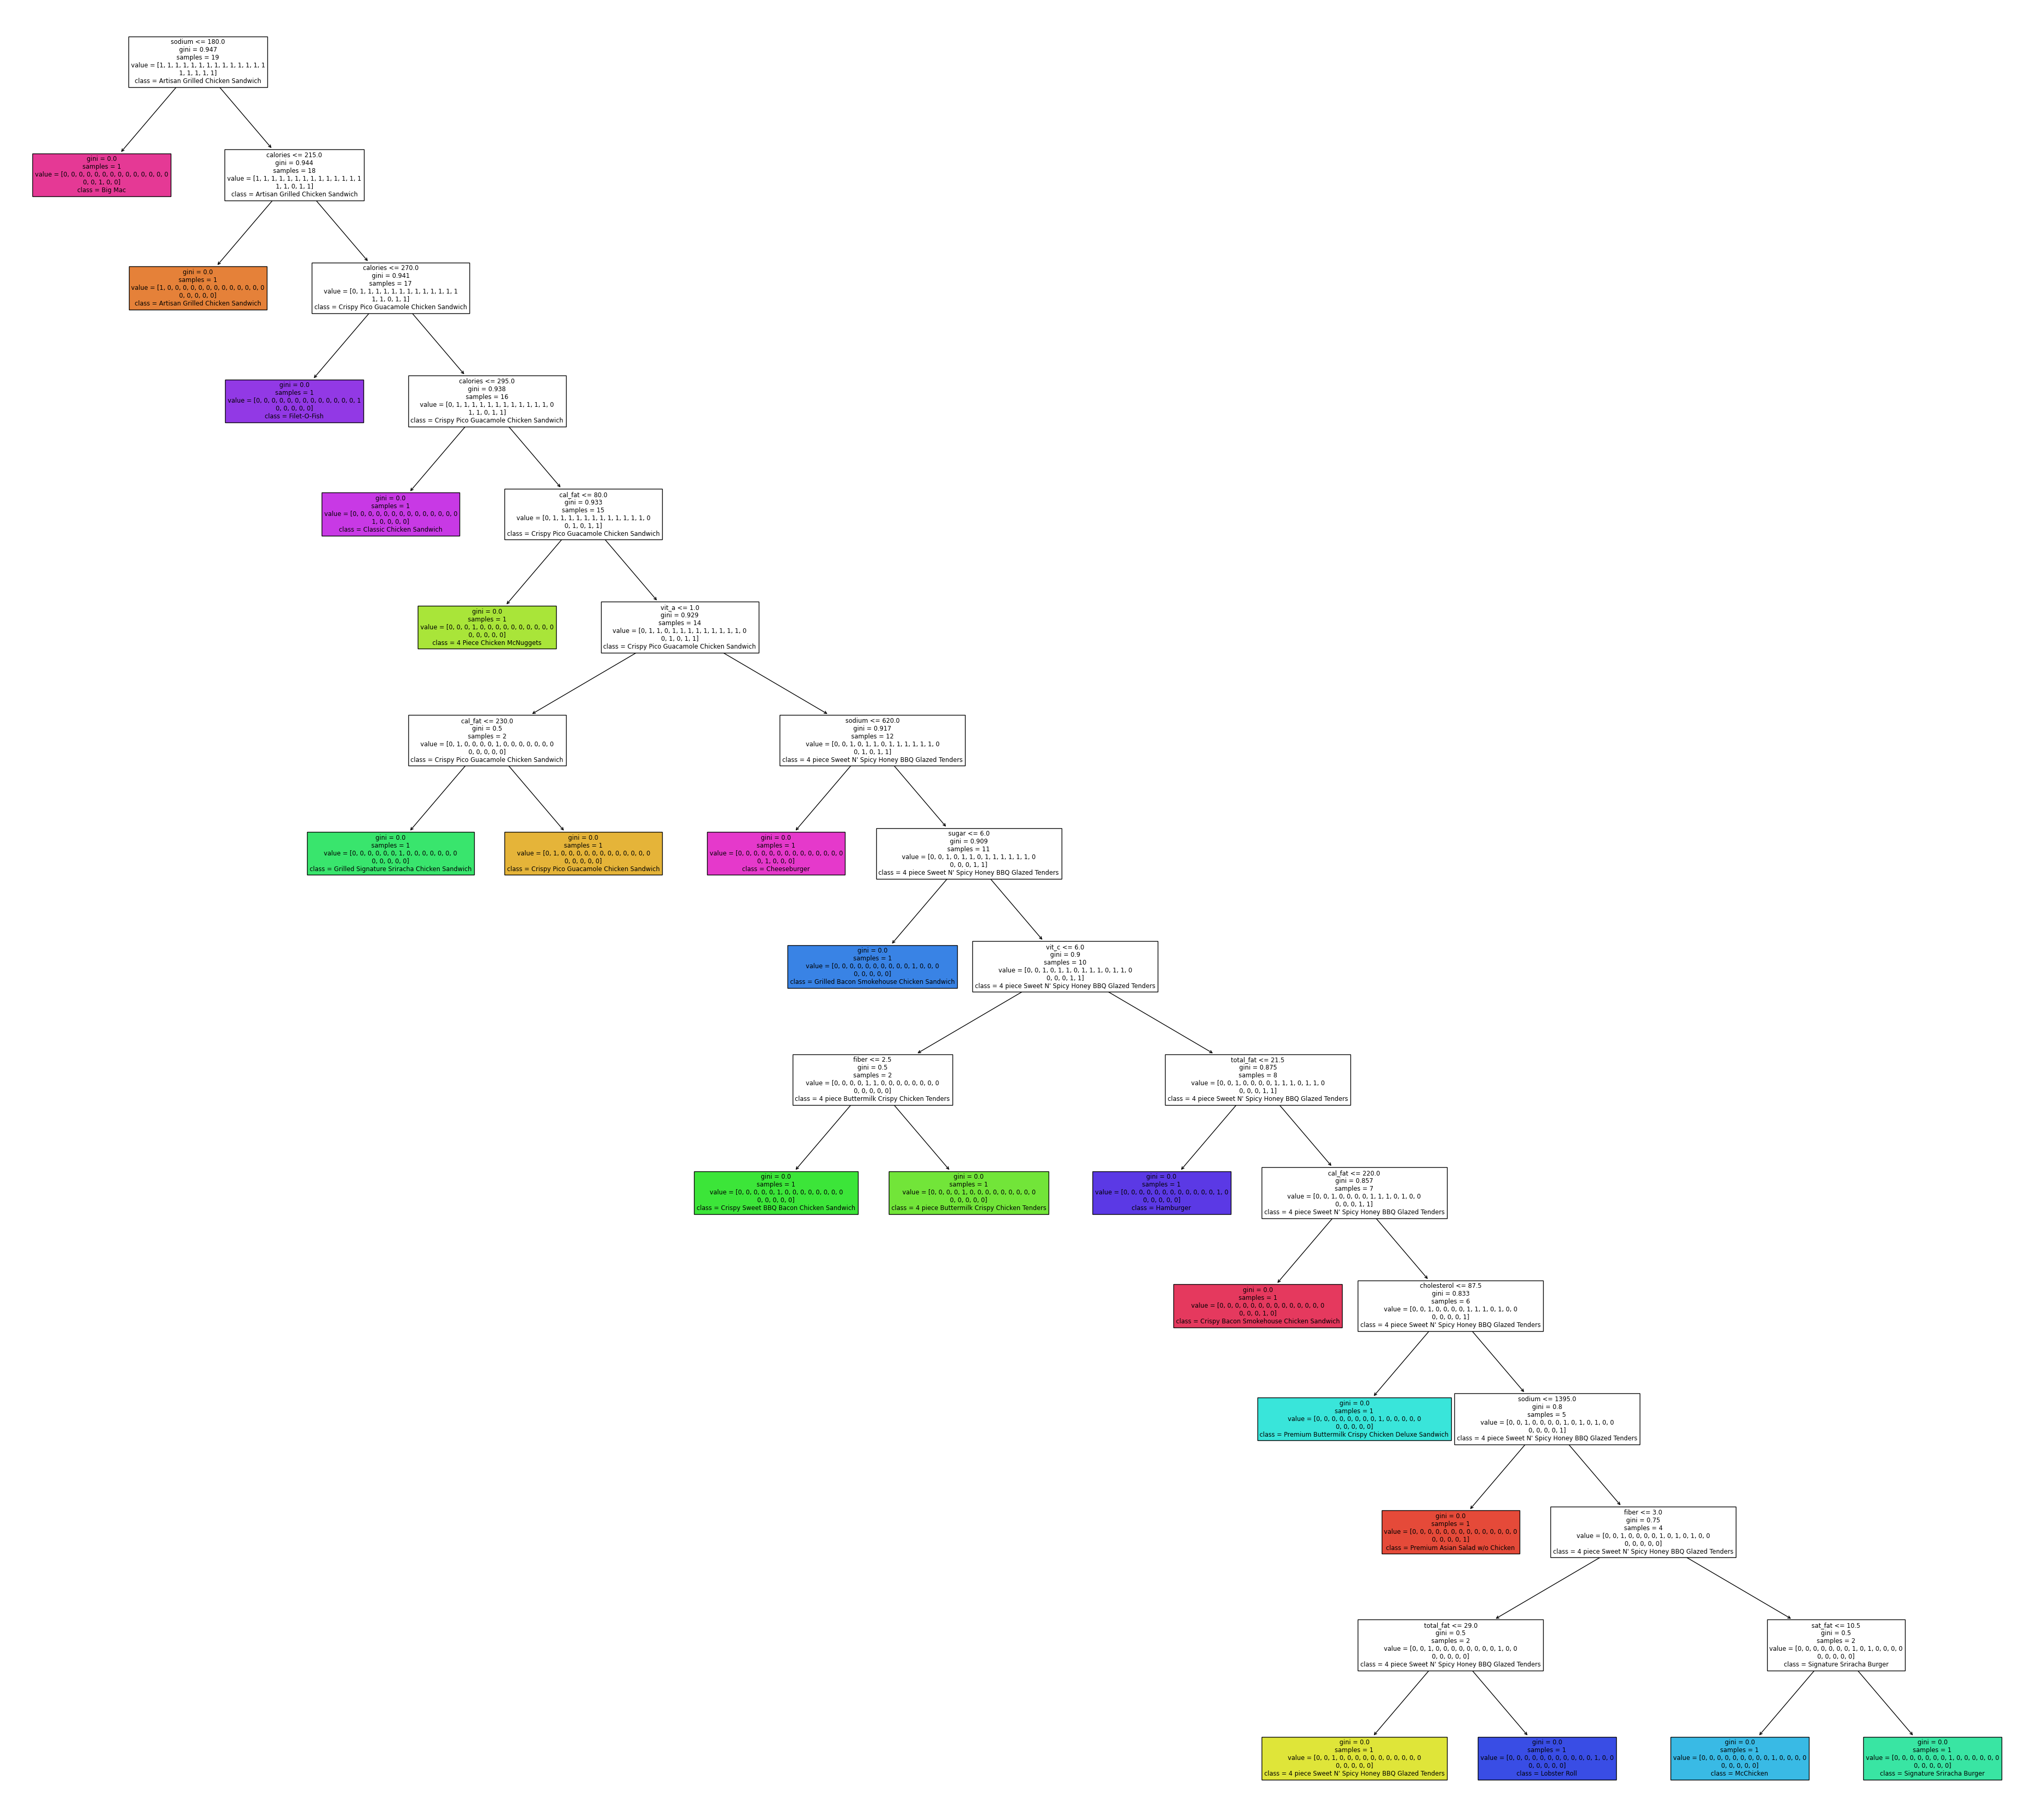

In [26]:
X = mcDf.drop(['item'], axis=1)
Y = mcDf['item']
dt = tree.DecisionTreeClassifier(
    criterion='gini', min_samples_split=2, min_samples_leaf=1, random_state=99)
dtModel = dt.fit(X, Y)
treeRepr = tree.export_text(dtModel)
fig = plt.figure(figsize=(50, 45))
_ = tree.plot_tree(dtModel,
                   feature_names=list(X.columns),
                   class_names=Y.value_counts().index,
                   filled=True)


So for the better results you probably have to expland it and after explanding it I have found the similar foods. Similar foods are those who are closer to each other. 
{Lobster Roll 
4 piece Sweet N' Spicy Honey BBQ Glazed Tenders}

{McChiken
Signature Sriracha Burger}

They all the located at the leavs so thus they are very similar